#Exploratory Data Analysis

##Hubungan Industry Terhadap Gaji

###Persebaran Data Kolom Industry & Kolom Salary

Dilakukan visualisasi distribusi persebaran data pada kolom industry dengan data pada kolom salary. Data salary yang digunakan adalah data usd_salary yang sudah dikonversi currencynya dan diubah menjadi USD.

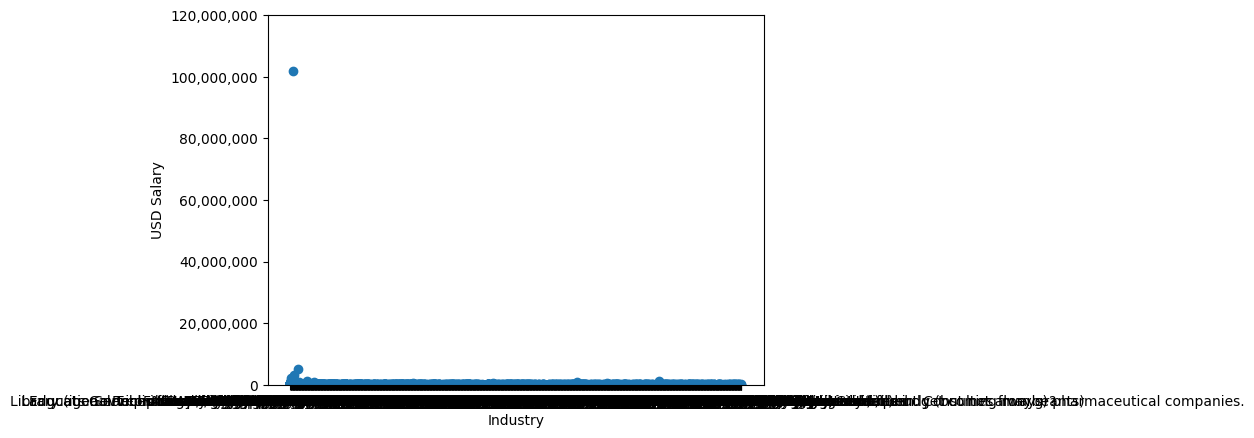

In [ ]:
plt.scatter(df['industry'], df['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
ytick_labels = [f'{y:,.0f}' for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], ytick_labels)
plt.ylim(0, plt.ylim()[1])
plt.show()

Pada visualisasi di atas, terdapat 1 outlier dengan gaji di atas 100.000.000 USD

###Hubungan Industry terhadap Nilai Maksimum Gaji

Untuk melihat outlier dan juga nilai maximum setiap industry

In [ ]:
industry_salary = df[['industry', 'usd_salary']]
industry_salary_max = industry_salary.groupby(['industry'])['usd_salary'].max().reset_index()
industry_salary_max = industry_salary_max.sort_values(by=['usd_salary'], ascending=False)
industry_salary_max = industry_salary_max.reset_index(drop=True)
industry_salary_max

,industry,usd_salary
0,Utilities & Telecommunications,102000000
1,Sales,5000044
2,Art & Design,3000000
3,Computing or Tech,2111538
4,Health care,1900000
...,...,...
1204,Customer service,55
1205,Museum (University Affiliated),40
1206,student,0
1207,Stay-at-home parent,0


Didapatkan bahwa industry dengan gaji terbesar berdasarkan nilai max adalah Industri Utilities & Telecommunications dengan gaji 102.000.000 USD

In [ ]:
max_salary_idx = df['usd_salary'].idxmax()
df.loc[max_salary_idx]

Timestamp                                              2021-04-27 12:11:16.839000
age                                                                         25-34
industry                                           Utilities & Telecommunications
job_title                                                      Operations Manager
job_title_additional_context                                                  NaN
salary                                                                  102000000
additional_salary                                                             NaN
currency                                                                      USD
other_currency                                                                COP
income_additional_context       Colombian peso - converting to usd it seems lo...
country                                                                  Colombia
us_country                                                                    NaN
city            

Terlihat pada data di atas pekerjaan dengan gaji 102.000.000 USD adalah Operations Manager. Tetapi anehnya, dia entry data currency sebagai USD namun entry juga di other_currency sebagai COP (Colombian Peso). Jika dilihat income_additional_context nya, "Colombian peso - converting to usd it seems low, but in terms of local value, it is quite high" tidak jelas apakah currency nya USD atau COP, tetapi dilihat dari Countrynya yaitu negara Colombia. Jika memang COP maka annual salary harus di ubah ke USD untuk menghilangkan outlier ini.

Berdasarkan kesimpulan di atas, dicoba untuk mengubah data salary 102.000.000 USD menjadi COP. Data tersebut memiliki index 3605.

In [ ]:
df.loc[3605, 'new_currency'] = 'COP'
df.loc[3605, 'usd_salary'] = (df.loc[3605, 'salary'] / 4526.90)

In [ ]:
df['usd_salary'] = df['usd_salary'].astype(int)
df.loc[3605]

Timestamp                                              2021-04-27 12:11:16.839000
age                                                                         25-34
industry                                           Utilities & Telecommunications
job_title                                                      Operations Manager
job_title_additional_context                                                  NaN
salary                                                                  102000000
additional_salary                                                             NaN
currency                                                                      USD
other_currency                                                                COP
income_additional_context       Colombian peso - converting to usd it seems lo...
country                                                                  Colombia
us_country                                                                    NaN
city            

Didapatkan data pada index 3605 yang memiliki salary 102.000.000 USD  memiliki setelah diubah memiliki nominal 21370. Berikut ini persebaran data industry dan salary jika divisualisasikan.

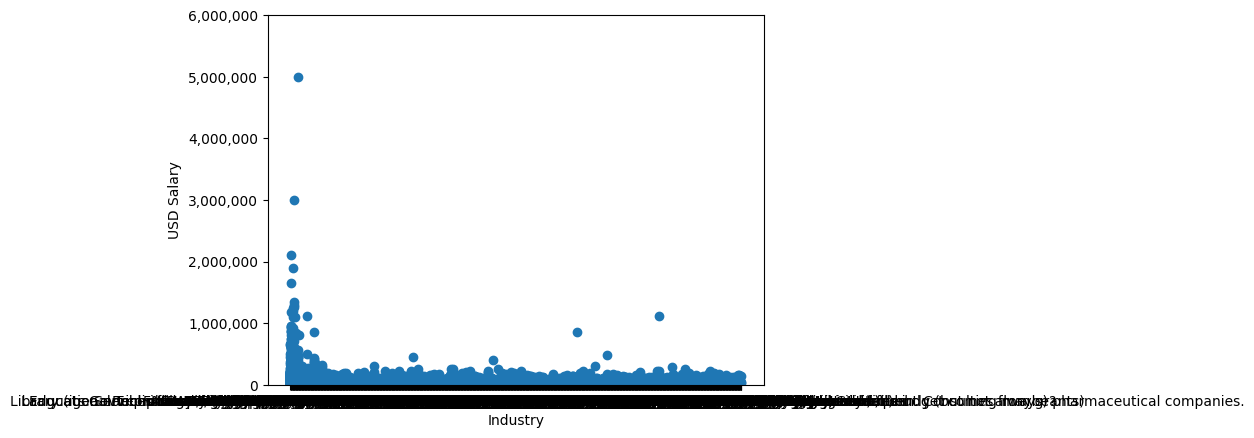

In [ ]:
plt.scatter(df['industry'], df['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
ytick_labels = [f'{y:,.0f}' for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], ytick_labels)
plt.ylim(0, plt.ylim()[1])
plt.show()

Didapatkan bahwa salary tertinggi ada di atas nominal 5.000.000 USD.



In [ ]:
max_salary_idx = df['usd_salary'].idxmax()
print(max_salary_idx)

26466


In [ ]:
df.loc[26466]

Timestamp                       2021-06-14 04:19:17.179000
age                                                  55-64
industry                                             Sales
job_title                             Inside sales manager
job_title_additional_context                           NaN
salary                                             5000044
additional_salary                                   4000.0
currency                                               USD
other_currency                                         NaN
income_additional_context                              NaN
country                                                Usa
us_country                                      New Jersey
city                                             Pinebrook
work_experience_overall                      31 - 40 years
work_experience_professional                 21 - 30 years
education                                  Master's degree
gender                                               Wom

Setelah dicari, data salary tertinggi yang dicari dengan nilai max memiliki index 26466. Industrynya adalah sales dan nominal gajinya adalah 5.000.044 USD.

###Hubungan Industry terhadap Nilai Rata-Rata Gaji

Mencari 10 industri dengan rata-rata gaji tertinggi dan terendah.

In [ ]:
# menghitung rata-rata gaji untuk setiap industri
mean_salary_by_industry = df.groupby('industry')['usd_salary'].mean()

# mengurutkan nilai rata-rata dari tertinggi ke terendah
sorted_mean_salary_by_industry = mean_salary_by_industry.sort_values(ascending=False)

# memilih 10 industri teratas dan terendah
top_10_highest_industries = sorted_mean_salary_by_industry.head(10).reset_index()
top_10_lowest_industries = sorted_mean_salary_by_industry.tail(10).reset_index()

# menampilkan hasil
result_highest = top_10_highest_industries[['industry', 'usd_salary']]
result_lowest = top_10_lowest_industries[['industry', 'usd_salary']]
print("10 industri dengan rata-rata gaji tertinggi :\n", result_highest)
print("\n10 industri dengan rata-rata gaji terendah :\n", top_10_lowest_industries)

10 industri dengan rata-rata gaji tertinggi :
                                             industry  usd_salary
0                                                Ipr   1123595.0
1                                                Oil    850617.0
2          Commercial Building Material Distribution    400000.0
3                                             Sports    300000.0
4                                 Corporate Training    280000.0
5  Energy (oil & gas & associated products, renew...    253300.0
6                         Multilateral Organisation     250000.0
7                       Pharmaceutical/biotechnology    227500.0
8                                   Customer service    222652.0
9                            Biotech/pharmaceuticals    222000.0

10 industri dengan rata-rata gaji terendah :
                                             industry  usd_salary
0                        Obligatory Military service      3269.0
1            Child Care Resource and Referral Agency      320

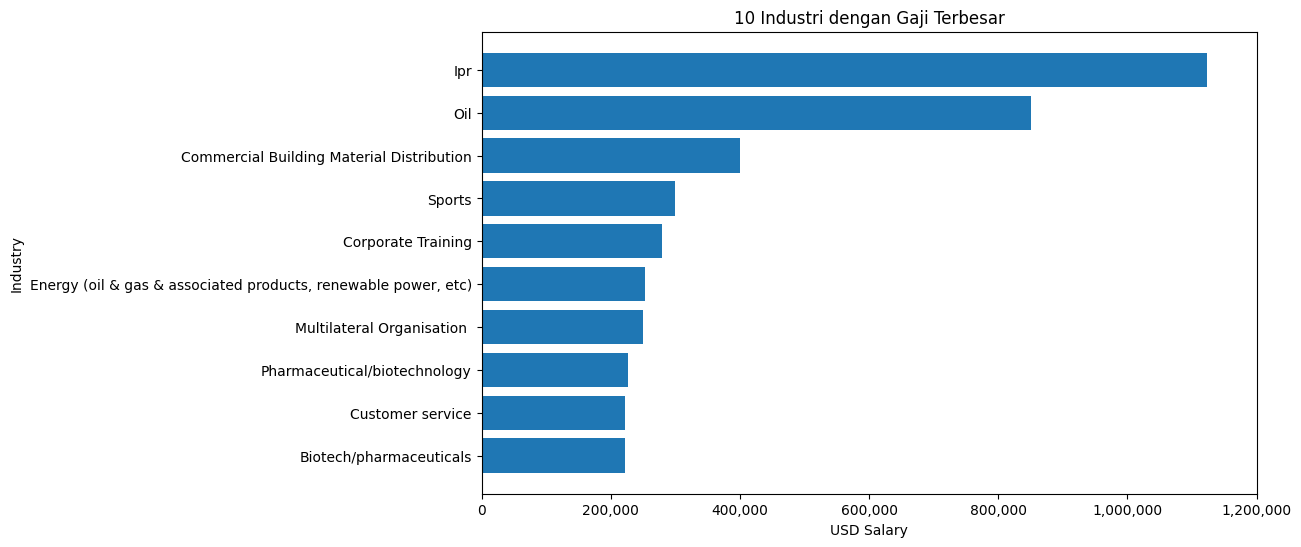

In [ ]:
# membuat horizontal bar chart untuk 10 industri teratas
plt.figure(figsize=(10, 6))
plt.barh(top_10_highest_industries['industry'], top_10_highest_industries['usd_salary'])
plt.ylim(reversed(plt.ylim()))
plt.xlabel('USD Salary')
plt.ylabel('Industry')
plt.title('10 Industri dengan Gaji Terbesar')
xtick_labels = [f'{x:,.0f}' for x in plt.xticks()[0]]
plt.xticks(plt.xticks()[0], xtick_labels)
plt.xlim(0, plt.xlim()[1])
plt.show()

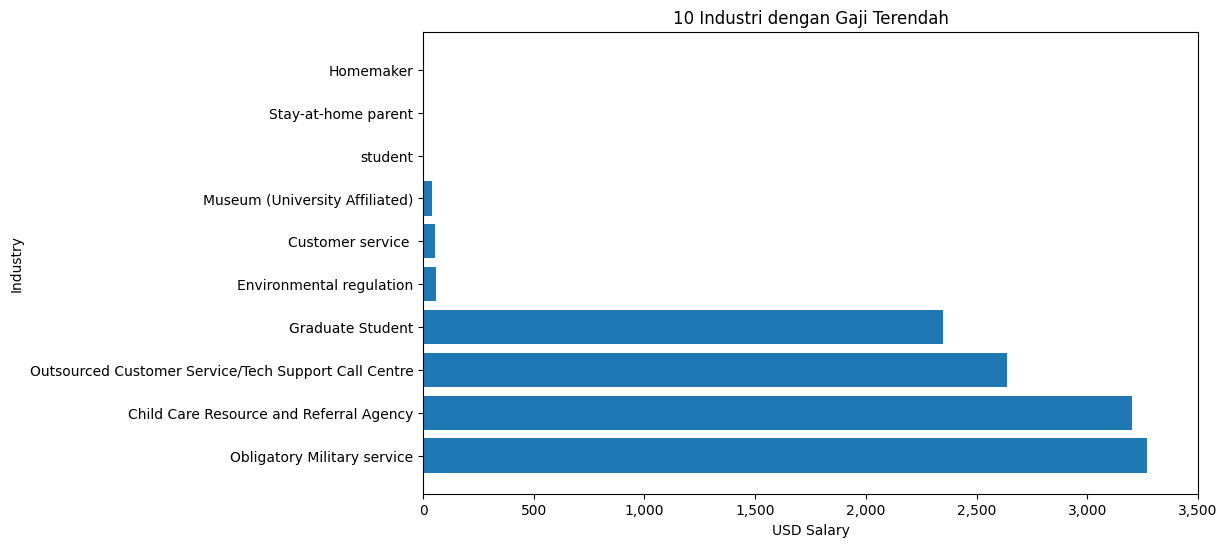

In [ ]:
# membuat horizontal bar chart untuk 10 industri terendah
plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest_industries['industry'], top_10_lowest_industries['usd_salary'])
plt.xlabel('USD Salary')
plt.ylabel('Industry')
plt.title('10 Industri dengan Gaji Terendah')
xtick_labels = [f'{x:,.0f}' for x in plt.xticks()[0]]
plt.xticks(plt.xticks()[0], xtick_labels)
plt.xlim(0, plt.xlim()[1])
plt.show()

Pada visualisasi di atas, terlihat jarak yang jauh antara rata-rata gaji industry IPR,OIL dengan industry lainnya. Dapat disimpulkan, alasannya banyak pekerja di industri IPR(Intellectual Property Rights) adalah ahli hukum atau spesialis teknologi informasi dan mungkin permintaan pasar yang tinggi untuk melindungi hak cipta perusahaan lain sehingga memungkinkan mendapatkan gaji yang relatif tinggi dari industry lainnya. Sama halnya dengan industry OIL yang merupakan pekerjaan pertambangan minyak yang termasuk pekerjaan beresiko tinggi dan membutuhkan keahlian tinggi.
 
Sebaliknya gaji terendah yaitu para pelajar (student), stay-at-home parent, dan homemaker dengan gaji 0 karena tidak mendapatkan gaji dari perusahaan atau pihak tertentu



##Hubungan Pengalaman Kerja Terhadap Gaji  

###Hubungan Pengalaman Kerja Secara Keseluruhan Terhadap Gaji  

Text(0.5, 0, 'Tahun Pengalaman Kerja')

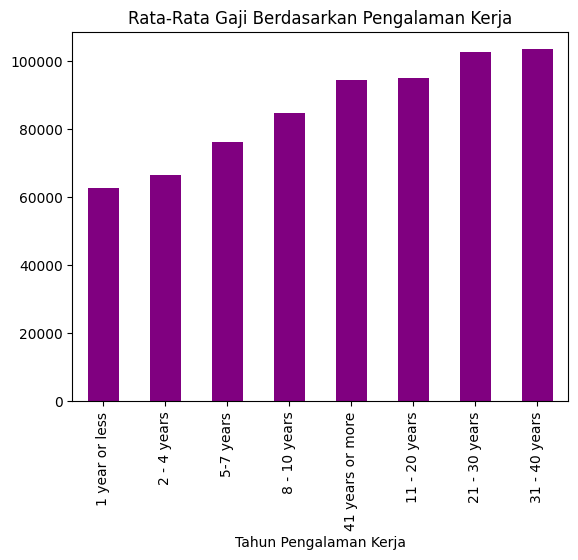

In [ ]:
mean_salary_by_year = df.groupby('work_experience_overall')['usd_salary'].mean()
mean_salary_by_year = mean_salary_by_year.sort_values()
mean_salary_by_year.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja')
plt.xlabel('Tahun Pengalaman Kerja')

Didapatkan bahwa pengalaman kerja secara keseluruhan selama 1 tahun atau kurang memiliki gaji paling rendah dan pengalaman kerja secara keseluruhan selama 31-40 tahun memiliki gaji paling tinggi. Semakin lama pekerja bekerja dan banyak mempunyai pengalaman bekerja maka akan berpengaruh terhadap besaran gaji, hal ini bisa didasari dari pangkat atau posisi, tempat atau industry, keterampilan yang dimiliki, atau faktor lainnya. Oleh karena itu, penting untuk dilakukan analisis lebih lanjut seperti menggunakan metode regresi linear untuk melihat seberapa besar pengaruh pengalaman kerja terhadap gaji

###Hubungan Pengalaman Kerja di Bidangnya Terhadap Gaji 

Text(0.5, 0, 'Tahun Pengalaman Kerja')

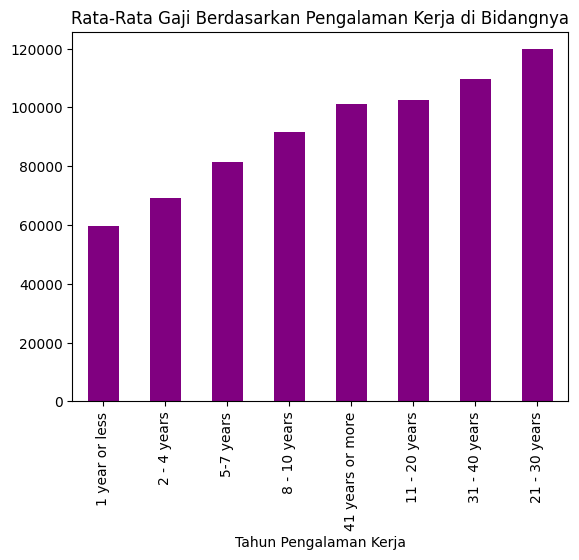

In [ ]:
mean_salary_by_year_prof = df.groupby('work_experience_professional')['usd_salary'].mean()
mean_salary_by_year_prof = mean_salary_by_year_prof.sort_values()
mean_salary_by_year_prof.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja di Bidangnya')
plt.xlabel('Tahun Pengalaman Kerja')

Didapatkan bahwa pengalaman kerja di bidangnya selama 1 tahun atau kurang memiliki gaji paling rendah dan pengalaman kerja di bidangnya selama 21 - 30 tahun memiliki gaji paling tinggi. Pengalaman kerja di bidangnya dapat berpengaruh terhadap gaji, semakin banyak pengetahuan dan keterampilan yang didapatkan, maka berpengaruh terhadap besaran gaji yang diterima.

##Hubungan Jenis Kelamin Terhadap Gaji 

Text(0.5, 0, 'Jenis Kelamin')

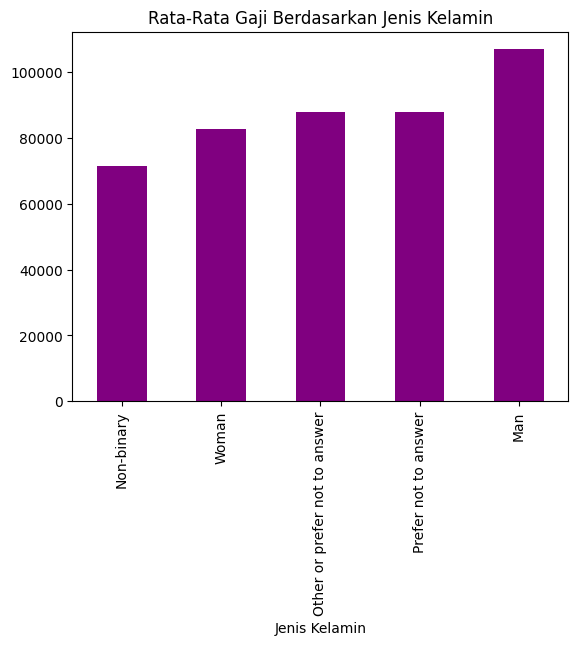

In [ ]:
mean_salary_by_gender = df.groupby('gender')['usd_salary'].mean()
mean_salary_by_gender = mean_salary_by_gender.sort_values()
mean_salary_by_gender.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')

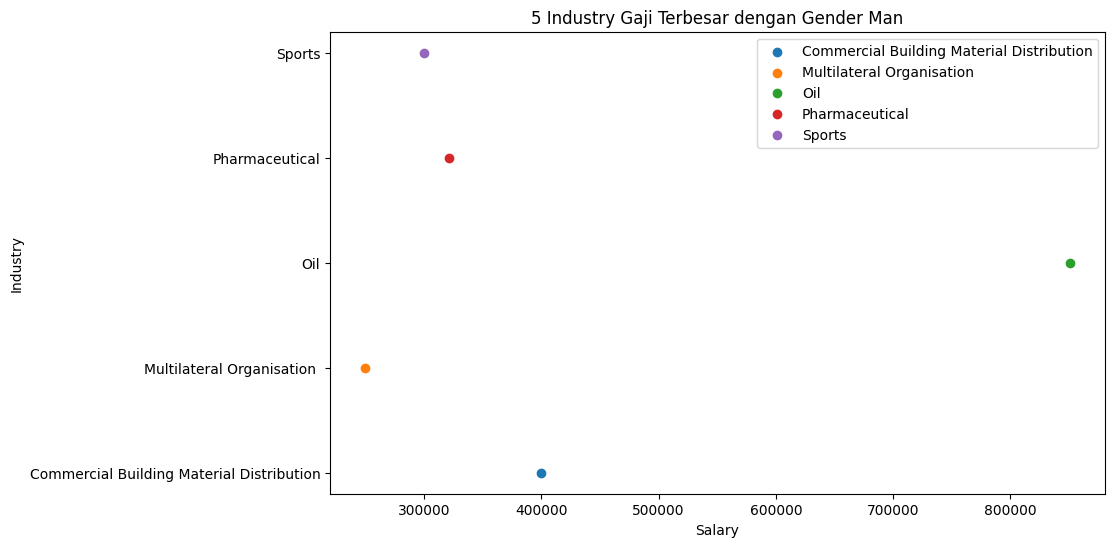

In [ ]:
# mengambil data hanya untuk gender Man
man_data = df[df['gender'] == 'Man']

# mengambil data untuk top 5 industry dengan gaji tertinggi
top5_industry = man_data.groupby('industry')['usd_salary'].mean().sort_values(ascending=False).head(5)

# membuat dataframe baru untuk top 5 industry
top5_df = man_data[man_data['industry'].isin(top5_industry.index)]

# membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))

for industry, data in top5_df.groupby('industry'):
    ax.scatter(data['usd_salary'], data['industry'], label=industry)

ax.legend()
ax.set_xlabel('Salary')
ax.set_ylabel('Industry')
ax.set_title('5 Industry Gaji Terbesar dengan Gender Man')

plt.show()

Didapatkan hubungan rata-rata gaji dengan gender yaitu dari yang gaji terendah menuju tertinggi adalah gender Non-binary, Woman, Other or prefer not to answer, Prefer not to answer, dan Man. Berdasarkan visualisasi di atas, laki-laki memiliki gaji terbesar dari dataset salary, beberapa faktor yang menyebabkan hal ini mungkin ada bias gender dalam industry, lima industry besar dengan gaji tertinggi yang banyak mempekerjakan laki-laki adalah Commercial Building Material Distribution, Pharmaceutical, Sports, Multilateral Organisation.

##Hubungan Gaji Terhadap Tingkat Pendidikan  

Text(0.5, 0, 'Tingkat Pendidikan')

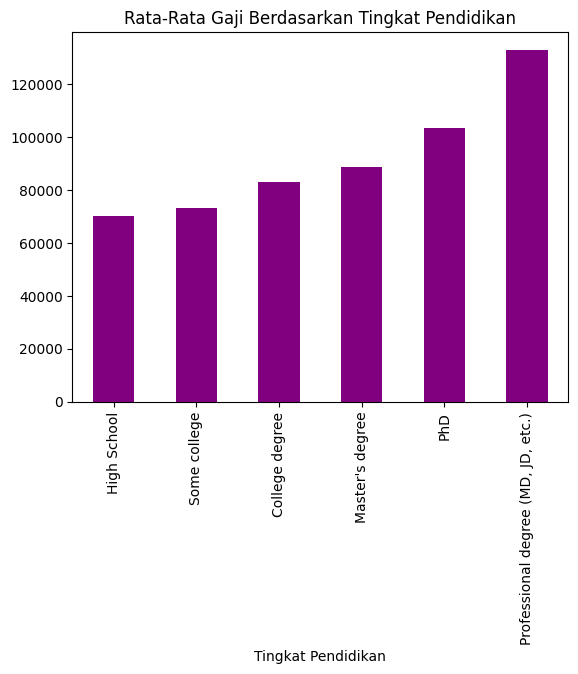

In [ ]:
mean_salary_by_education = df.groupby('education')['usd_salary'].mean()
mean_salary_by_education = mean_salary_by_education.sort_values()
mean_salary_by_education.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')

Didapatkan hubungan rata-rata gaji dengan tingkat pendidikan yaitu dari yang gaji terendah High School, College degre, Master's degree, PhD, Some college, dan Professional degree.

##Hubungan Jenis Kelamin Terhadap Tingkat Pendidikan

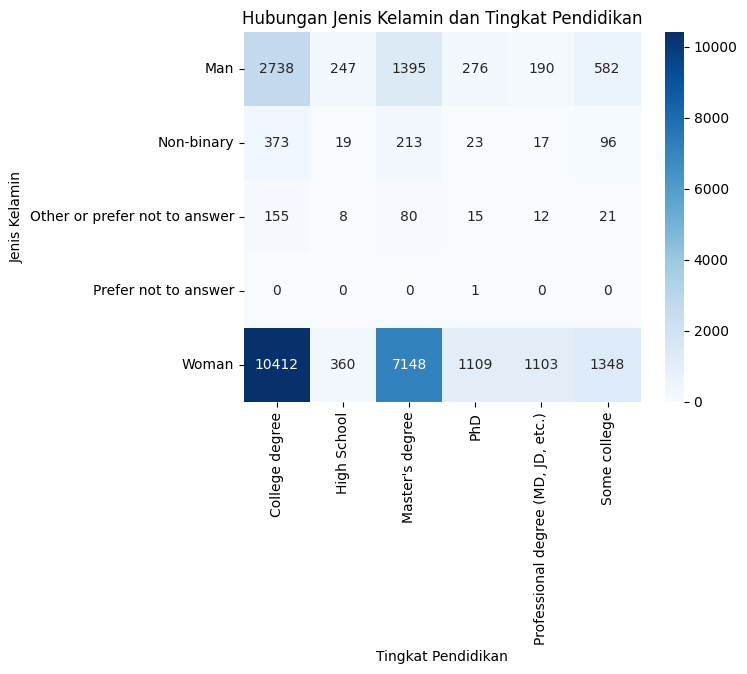

In [ ]:
# Membuat tabel kontingensi 
cont_table = pd.crosstab(df['gender'], df['education'])

# Menampilkan heatmap
sns.heatmap(cont_table, annot=True, cmap='Blues', fmt='.0f')
plt.title('Hubungan Jenis Kelamin dan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jenis Kelamin')
plt.show()

Dari tabel heatmap di atas, didapatkan kesimpulan sebagai berikut :
- Jenis kelamin 'Woman' memiliki frekuensi tingkat pendidikan terendah pada High School dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Prefer not to answer' memiliki tingkat pendidikan PhD.
- Jenis kelamin 'Other or prefer not to answer' memiliki frekuensi tingkat pendidikan terendah pada High School dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Non-binary' memiliki frekuensi tingkat pendidikan terendah pada Professional degree dan frekuensi tingkat pendidikan tertinggi pada College degree.
- Jenis kelamin 'Man' memiliki frekuensi tingkat pendidikan terendah pada Professional degree dan frekuensi tingkat pendidikan tertinggi pada College degree.